In [1]:
from wmse_sequence import WMSESequencialModel, WMSESequencialModelBuilder

import numpy as np
import matplotlib.pyplot as plot

In [2]:
hairpin_sizes = [(5, 5), (4, 5), (4, 6), (7, 4), (7, 3)]

models = []
total_size = 20
head_size = 2
for hairpin_size in hairpin_sizes:
    model = WMSESequencialModel(
        WMSESequencialModelBuilder(entropy_loss = 3.0)   
            .add_pike(head_size + hairpin_size[0])
            .add_pike(head_size + total_size)
            .add_pike(head_size + total_size)
            .add_pike(head_size + hairpin_size[1])
            .add_connection(1, head_size, hairpin_size[0], 1.0, 3.0, 1)
            .add_connection(3, head_size, hairpin_size[1], 1.0, 3.0, 1)
            .add_connection(2, total_size - 7, 6, 1.0, 3.0, 2)
    )
    models.append(model)

In [3]:
model_labels = [
    "6, 6 hairpin - difference 0",
    "5, 6 hairpin - difference 1",
    "5, 7 hairpin - difference 2",
    "8, 5 hairpin - difference 3",
    "8, 4 hairpin - difference 4"
]

In [4]:
temperatures = np.arange(0.03, 0.30, 0.001)

In [5]:
melting_curves = [map(lambda t: model.get_link_probability(t)[1], temperatures) for model in models]

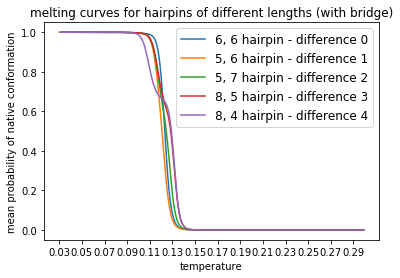

In [10]:
plot.figure(figsize=(6, 4))
for name, mc in zip(model_labels, melting_curves):
    plot.plot(mc, label=name)
    
plot.title('melting denaturation for hairpins of different lengths (with bridge)')   
plot.legend(fontsize='large')
plot.xlabel('temperature')
plot.ylabel('mean probability of native conformation')
plot.xticks(range(0, len(temperatures), 20), np.round(temperatures[::20], decimals=2))
plot.show()

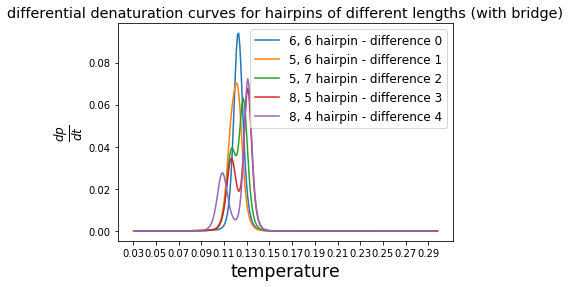

In [14]:
plot.figure(figsize=(6, 4))
for name, mc in zip(model_labels, melting_curves):
    diff = np.diff(mc)
    plot.plot(-diff, label=name)
plot.title('differential denaturation curves for hairpins of different lengths (with bridge)', fontsize='x-large')
plot.legend(fontsize='large')
plot.xlabel('temperature', fontsize='xx-large')
plot.ylabel('$\\frac{dp}{dt}$', fontsize='xx-large')
plot.xticks(range(0, len(temperatures), 20), np.round(temperatures[::20], decimals=2))
plot.show()

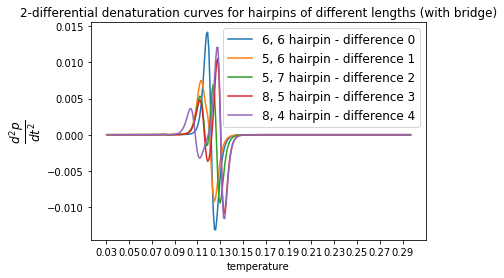

In [12]:

plot.figure(figsize=(6, 4))
for name, mc in zip(model_labels, melting_curves):
    diff = np.diff(np.diff(mc))
    plot.plot(-diff, label=name)
plot.title('2-differential denaturation curves for hairpins of different lengths (with bridge)')   
plot.legend(fontsize='large')
plot.xlabel('temperature')
plot.ylabel('$\\frac{d^2p}{dt^2}$', fontsize='xx-large')
plot.xticks(range(0, len(temperatures), 20), np.round(temperatures[::20], decimals=2))
plot.show()

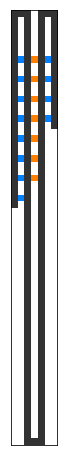

In [9]:
plot.figure(figsize=(8,8))
model.visualize(0.05)
plot.show()